In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdr-datasets/English.npz
/kaggle/input/hdr-datasets/Telugu.npz
/kaggle/input/hdr-datasets/THEA.npz
/kaggle/input/hdr-datasets/Devanagari.npz
/kaggle/input/hdr-datasets/Arabic.npz


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
%matplotlib inline

In [2]:
from numpy import load
data = load('/kaggle/input/hdr-datasets/THEA.npz')
x_train = data[data.files[0]]
x_test = data[data.files[1]]
y_train = data[data.files[2]]
y_test = data[data.files[3]]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320000, 28, 28), (80000, 28, 28), (320000,), (80000,))

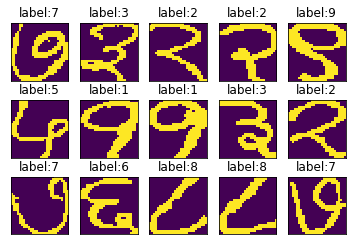

In [5]:
def preview(data, result):
  """Shows 15 elements of picture dataset"""
  fig = plt.figure()
  for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(data[i], interpolation='none')
    plt.title("label:{}".format(result[i]))
    plt.xticks([])
    plt.yticks([])
preview(x_train, y_train)

In [6]:
# df_comb = pd.DataFrame(np.concatenate((y_train, y_test)))
# df_comb[0].value_counts()

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# same as np.expand_dims(x_train, axis=-1)

In [5]:
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

2023-02-08 05:31:57.039697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 05:31:57.040801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 05:31:57.199822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 05:31:57.200800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 05:31:57.201617: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [6]:
print(x_train.shape, x_test.shape)

(320000, 28, 28, 3) (80000, 28, 28, 3)


In [7]:
# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32])

In [8]:
x_test = tf.image.resize(x_test, [32,32])
x_test.shape

TensorShape([80000, 32, 32, 3])

In [9]:
print(x_train.shape, x_test.shape)

(320000, 32, 32, 3) (80000, 32, 32, 3)


In [11]:
# from tensorflow.keras.applications.resnet50 import ResNet50
# model = Sequential()

# model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))

# # 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
# model.add(layers.Dense(10, activation = 'softmax'))

# # Say not to train first layer (ResNet) model as it is already trained
# model.layers[0].trainable = False

# # Now that we apply global max pooling.
# gap = tf.keras.layers.GlobalMaxPooling2D()(efnet.output)

# # Finally, we add a classification layer.
# output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(gap)

# # bind all
# func_model = tf.keras.Model(efnet.input, output)

In [18]:
model = Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_1 (Resizing)        (None, 224, 224, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [19]:
inp_layer = tf.keras.Input(shape=(224,224,3))
resnet_pret = tf.keras.applications.ResNet50(weights='imagenet',
                                             include_top = False, 
                                             input_tensor = inp_layer,
                                            pooling = 'avg')

In [20]:
for i, layer in enumerate(resnet_pret.layers):
    if i<143:
        layer.trainable = False
    print(i, layer.name, "-", layer.trainable)

0 input_2 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [21]:
model.add(resnet_pret)
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

In [64]:
# model.layers[1].trainable = False

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_1 (Resizing)        (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 14,996,490
Non-trainable params: 8,611,712
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [24]:
np.random.seed(5)

In [25]:
model.fit(x_train, y_train, epochs=5, batch_size=16)

Epoch 1/5


2023-02-08 05:35:12.330796: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20000/20000 [==============================] - 1412s 70ms/step - loss: 0.2439 - accuracy: 0.9215
Epoch 2/5
20000/20000 [==============================] - 1395s 70ms/step - loss: 0.0551 - accuracy: 0.9818
Epoch 3/5
20000/20000 [==============================] - 1392s 70ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 4/5
20000/20000 [==============================] - 1393s 70ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 5/5
20000/20000 [==============================] - 1393s 70ms/step - loss: 0.0225 - accuracy: 0.9926


In [26]:
model.evaluate(x_test, y_test, batch_size=32)

2023-02-08 07:35:59.061121: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 983040000 exceeds 10% of free system memory.


2500/2500 [==============================] - 230s 91ms/step - loss: 0.0285 - accuracy: 0.9912


[0.028495807200670242, 0.9911999702453613]

In [27]:
model.save('/kaggle/working/resnet_143-untrainable_batch-16.h5')
print("Saved !")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved !


In [28]:
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

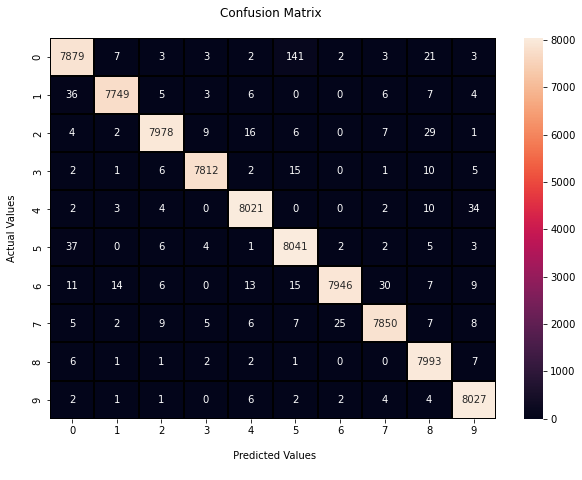

In [29]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
fx=sn.heatmap(cm, annot=True, linewidths=0.25, fmt='d', linecolor="black")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [30]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels)

In [36]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8064
           1       1.00      0.99      0.99      7816
           2       0.99      0.99      0.99      8052
           3       1.00      0.99      1.00      7854
           4       0.99      0.99      0.99      8076
           5       0.98      0.99      0.98      8101
           6       1.00      0.99      0.99      8051
           7       0.99      0.99      0.99      7924
           8       0.99      1.00      0.99      8013
           9       0.99      1.00      0.99      8049

    accuracy                           0.99     80000
   macro avg       0.99      0.99      0.99     80000
weighted avg       0.99      0.99      0.99     80000

